In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
%matplotlib inline

In [2]:
# CONSTANTS
NX = 9 # number of inside corners in x
NY = 6 # number of inside corners in y
PATH_TO_CALIB_IMG = "./camera_cal/"

In [3]:
# Helper Functions
def GetImageDataFromFolder(path=PATH_TO_CALIB_IMG):
    imageFiles = glob.glob(path+'calibration*.jpg')
    return [cv2.cvtColor(cv2.imread(imFile), cv2.COLOR_BGR2GRAY) for imFile in imageFiles]

def CalibrateCamera(images, nx=NX, ny=NY):
    img_size = (images[0].shape[1], images[0].shape[0])
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:ny, 0:nx].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    for img in images:
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(img, (nx,ny), None)
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    
    return mtx, dist


    

In [4]:
Images = GetImageDataFromFolder()
print("Calibration Images: ", len(Images), " Each Image: ", Images[0].shape)

Calibration Images:  20  Each Image:  (720, 1280)


In [5]:
# Calibrate Camera 
mtx, dist = CalibrateCamera(Images)
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "mtx_dist_pickle.p", "wb" ) )


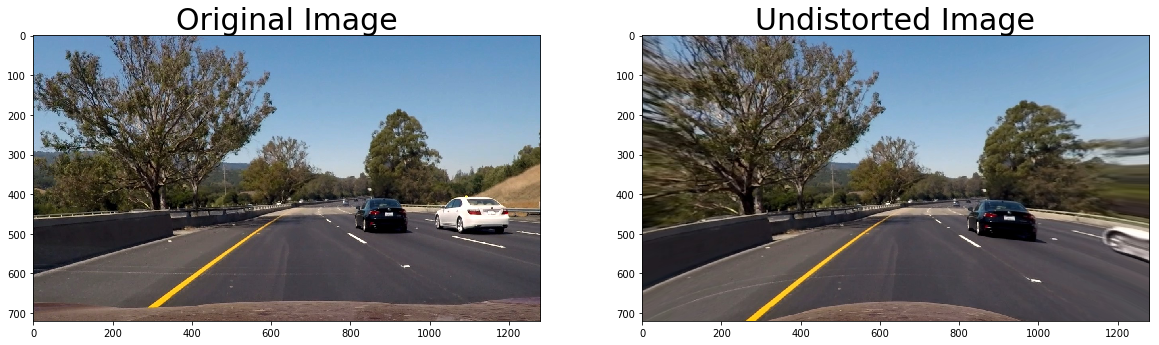

In [6]:
# Grab test images
test_imgs = [cv2.cvtColor(cv2.imread(imFile), cv2.COLOR_BGR2RGB) for imFile in glob.glob('./test_images/*.jpg')]

# Sample Undistortion
for idx, img in enumerate(test_imgs):
    img_undist = cv2.undistort(img, mtx, dist, None, mtx)
    cv2.imwrite('./test_images_output/test_undist_'+str(idx)+'.jpg',img_undist)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_imgs[-1])
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(img_undist)
ax2.set_title('Undistorted Image', fontsize=30)